## Tech Salary Analysis

This project analyzes salary distributions in the technology sector using a real-world dataset
from Glassdoor. The analysis includes data cleaning, statistical summaries, and visualizations
to understand how salaries vary across industries and company ratings.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("glassdoor_jobs.csv")

df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [14]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [15]:
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

In [16]:
# Salary Estimate
df = df[df["Salary Estimate"] != "-1"]

df["Salary Estimate"] = (
    df["Salary Estimate"]
    .str.replace("(Glassdoor est.)", "", regex=False)
    .str.replace("$", "", regex=False)
    .str.replace("K", "", regex=False)
)

# Min / Max / Avg salary
df[["MinSalary", "MaxSalary"]] = df["Salary Estimate"].str.split("-", expand=True)

df["MinSalary"] = pd.to_numeric(df["MinSalary"], errors="coerce")
df["MaxSalary"] = pd.to_numeric(df["MaxSalary"], errors="coerce")

df["AvgSalary"] = (df["MinSalary"] + df["MaxSalary"]) / 2

In [17]:
df = df.dropna(subset=["AvgSalary", "Rating"])

In [18]:
df["AvgSalary"].describe()
df["AvgSalary"].quantile([0.25, 0.5, 0.75])


,AvgSalary
0.25,75.5
0.50,97.5
0.75,122.5


In [19]:
import os
os.makedirs("figures", exist_ok=True)


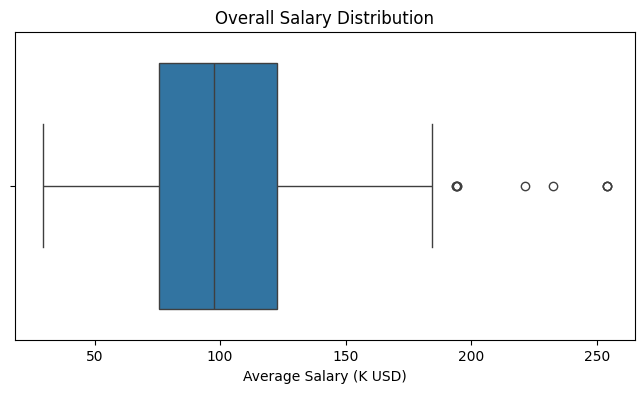

In [20]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["AvgSalary"])
plt.title("Overall Salary Distribution")
plt.xlabel("Average Salary (K USD)")
plt.savefig("figures/overall_salary_boxplot.png", dpi=300, bbox_inches="tight")
plt.show()

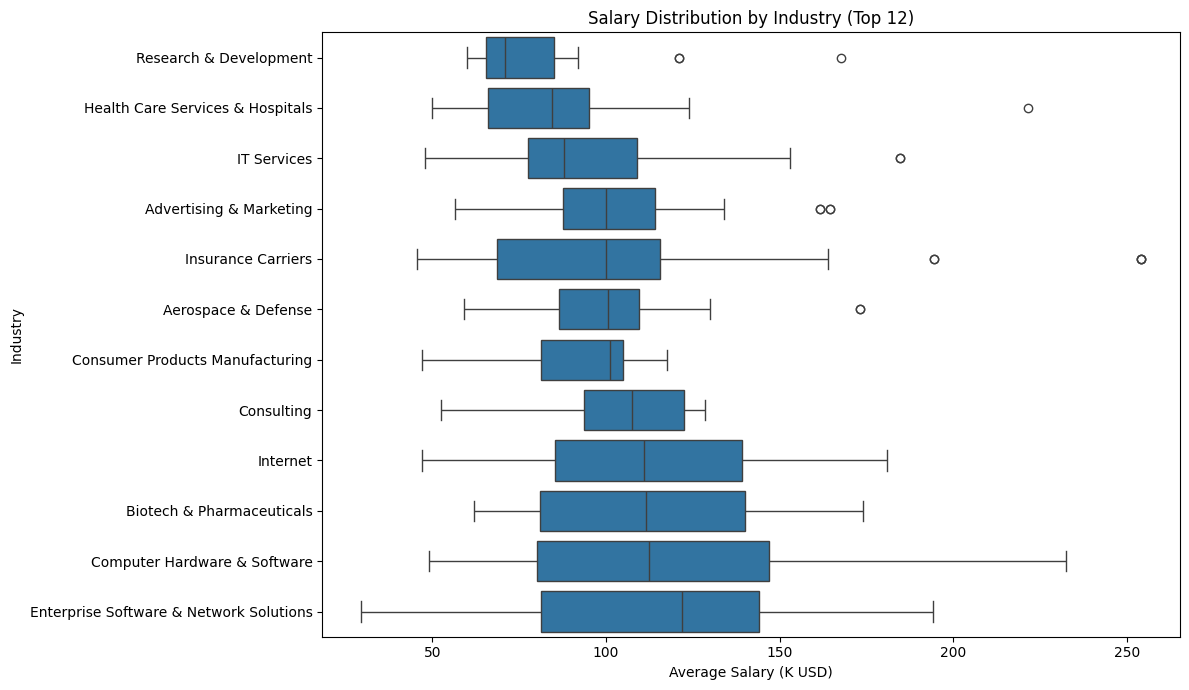

In [21]:
top_industries = df["Industry"].value_counts().head(12).index
df_top = df[df["Industry"].isin(top_industries)]

order = (
    df_top.groupby("Industry")["AvgSalary"]
    .median()
    .sort_values(ascending=True)
    .index
)

plt.figure(figsize=(12,7))
sns.boxplot(data=df_top, y="Industry", x="AvgSalary", order=order)
plt.title("Salary Distribution by Industry (Top 12)")
plt.xlabel("Average Salary (K USD)")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

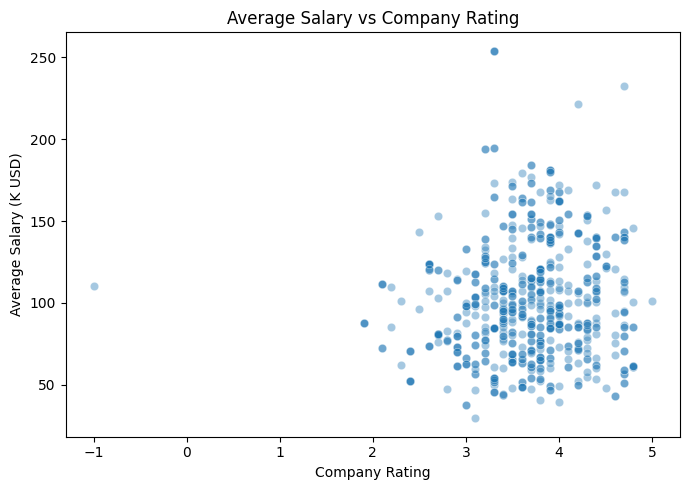

In [22]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Rating", y="AvgSalary", alpha=0.4)
plt.title("Average Salary vs Company Rating")
plt.xlabel("Company Rating")
plt.ylabel("Average Salary (K USD)")
plt.tight_layout()
plt.savefig("figures/industry_salary_boxplot.png", dpi=300, bbox_inches="tight")
plt.show()

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
df[["Rating", "AvgSalary"]].corr()

,Rating,AvgSalary
Rating,1.000000,0.093382
AvgSalary,0.093382,1.000000


In [25]:
import os
os.makedirs("figures", exist_ok=True)